In [1]:
import os
os.chdir("E:/Study/edWisor Stuff/Project2")
os.getcwd()

'E:\\Study\\edWisor Stuff\\Project2'

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("day.csv", sep = ',')

In [4]:
data.shape

(731, 16)

In [5]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [7]:
#changing data types
for i in ['season' , 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']:
    data[i] = data[i].astype(object)

In [8]:
copy1 = data.copy()
#data = copy1

In [9]:
#missing value analysis
pd.isnull(data).sum() #no missing value

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# Visualization

In [ ]:
sns.pairplot(data)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data.boxplot(column='cnt', by=['yr','mnth']) #over the years count of rental bikes have increased

In [ ]:
#season count
data.boxplot(column='cnt', by='season') #season 3 have maximum count while season 1 have least

In [ ]:
sns.countplot(x='workingday', data= data) #working days have more count

In [ ]:
sns.barplot(x='weekday', y='cnt', data= data) #every day of the week have same count

In [ ]:
sns.countplot(x='holiday', data= data)

In [ ]:
sns.countplot(x='weathersit', data= data) #weathersit 1 have highest count

In [ ]:
plt.scatter(x='season', y='mnth', data= data)

In [ ]:
sns.lmplot(x='temp',y='cnt',data=data, hue='season') 

In [ ]:
sns.distplot(data['temp'])
sns.distplot(data['atemp']) # seems correlated
plt.xlabel('temp and atemp')

In [11]:
cname = ['temp','atemp', 'hum','windspeed','casual','registered','cnt']
numeric_data = data[cname]
numeric_data.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,0.344167,0.363625,0.805833,0.160446,331,654,985
1,0.363478,0.353739,0.696087,0.248539,131,670,801
2,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# Outlier Analysis

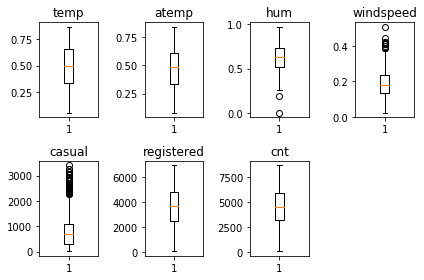

In [12]:
plt.subplot(2,4,1)
plt.boxplot(data['temp'])
plt.title('temp')

plt.subplot(2,4,2)
plt.boxplot(data['atemp'])
plt.title('atemp')

plt.subplot(2,4,3)
plt.boxplot(data['hum'])
plt.title('hum')

plt.subplot(2,4,4)
plt.boxplot(data['windspeed'])
plt.title('windspeed')

plt.subplot(2,4,5)
plt.boxplot(data['casual'])
plt.title('casual')

plt.subplot(2,4,6)
plt.boxplot(data['registered'])
plt.title('registered')

plt.subplot(2,4,7)
plt.boxplot(data['cnt'])
plt.title('cnt')

plt.tight_layout()

In [13]:
#outlier analysis
for i in cname:
    print(i)
    q75, q25 = np.percentile(data.loc[:,i],[75,25])
    iqr = q75- q25
    min = q25 - (1.5*iqr)
    max = q75 + (1.5*iqr)
    
    data.loc[data.loc[:,i] < min , i] = np.nan
    data.loc[data.loc[:,i] > max , i] = np.nan  

temp
atemp
hum
windspeed
casual
registered
cnt


In [ ]:
#pd.isnull(data).sum() #59outliers

In [ ]:
#Windspeed Vs Season
data.boxplot(column='windspeed', by=['season'])

In [14]:
#imputing missing windspeed
def impute_windspeed(cols):
    Season = cols[0]
    Windspeed = cols[1]
    
    if pd.isnull(Windspeed):
        if(Season==1 | Season==2):
            return 0.19
        else:
            return 0.17
    else:
        return Windspeed
    
    
data['windspeed'] = data[['season','windspeed']].apply(impute_windspeed, axis=1)

In [15]:
#imputing missing humidity
data['hum'] = data['hum'].fillna(data['hum'].mean())

In [16]:
#imputing missing casual
data['casual'] = data['casual'].fillna(data['cnt']-data['registered'])

# Feature Selection

In [ ]:
data.corr()

In [ ]:
sns.heatmap(data.corr(), vmin=-1.00, vmax=1.00, annot=True)

In [17]:
#Dropping variables
data = data.drop(['instant','atemp','casual','registered','dteday'], axis=1) 
#instant is unique for all observations hence has no significance
#atemp is strongly correlated with temp
#cnt = casual + registered
#data = data.drop(['instant','dteday'], axis=1) 

[0.06063582 0.29280023 0.03067949 0.00344259 0.01559701 0.0048055
 0.01805661 0.47007011 0.06933771 0.03457493]


Text(0,0.5,'Importance')

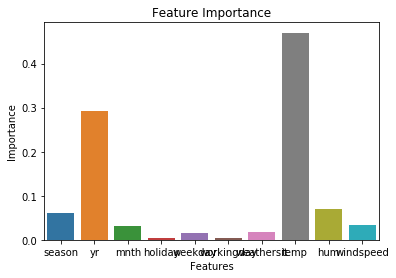

In [18]:
#feature importance from random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 123).fit(data.iloc[:,0:10],data.iloc[:,10])
print(rf.feature_importances_)

#Feature importance plotting
names=list(data)
names = names[0:10]

sns.barplot(x=names ,y=rf.feature_importances_)  #remove holiday, working day

plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')

In [ ]:
#anova test
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
mod1 = ols('cnt ~ season', data = data).fit()
aov_table1 = sm.stats.anova_lm(mod1, type=2)
print(aov_table1) #keep

In [ ]:
mod2 = ols('cnt ~ yr', data = data).fit()
aov_table2 = sm.stats.anova_lm(mod2, type=2)
print(aov_table2) #keep

In [ ]:
mod3 = ols('cnt ~ mnth', data = data).fit()
aov_table3 = sm.stats.anova_lm(mod3, type=2)
print(aov_table3) #keep

In [ ]:
mod4 = ols('cnt ~ holiday', data = data).fit()
aov_table4 = sm.stats.anova_lm(mod4, type=2)
print(aov_table4) #remove

In [ ]:
mod5 = ols('cnt ~ weekday', data = data).fit()
aov_table5 = sm.stats.anova_lm(mod5, type=2)
print(aov_table5) #remove

In [ ]:
mod6 = ols('cnt ~ workingday', data = data).fit()
aov_table6 = sm.stats.anova_lm(mod6, type=2)
print(aov_table6) #remove

In [ ]:
mod7 = ols('cnt ~ weathersit', data = data).fit()
aov_table7 = sm.stats.anova_lm(mod7, type=2)
print(aov_table7) #keep

In [19]:
#from anova and feature importance plotting of random forest, we decided to drop holiday and workingday
data = data.drop(['holiday', 'workingday'], axis=1)

In [20]:
data.head()

,season,yr,mnth,weekday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,6,2,0.344167,0.805833,0.160446,985.0
1,1,0,1,0,2,0.363478,0.696087,0.248539,801.0
2,1,0,1,1,1,0.196364,0.437273,0.248309,1349.0
3,1,0,1,2,1,0.200000,0.590435,0.160296,1562.0
4,1,0,1,3,1,0.226957,0.436957,0.186900,1600.0


In [21]:
#VIF test
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#get x and y dataframe
y, x = dmatrices('cnt~ + season + yr + mnth + weathersit + weekday + temp + hum + windspeed', data, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif

,VIF Factor,features
0,71.404340,Intercept
1,7.479236,season[T.2]
2,10.707834,season[T.3]
3,7.380504,season[T.4]
4,1.054067,yr[T.1]
5,1.831250,mnth[T.2]
6,2.603387,mnth[T.3]
7,5.699097,mnth[T.4]
8,6.846832,mnth[T.5]
9,7.362355,mnth[T.6]


In [ ]:
#FEATURE SCALING
#distribution of continuous features
plt.figure(figsize=(14,4))

plt.subplot(1,4,1)
sns.distplot(data['temp'])
plt.title('temperature distribution')

plt.subplot(1,4,2)
sns.distplot(data['hum'])
plt.title('humidity distribution')

plt.subplot(1,4,3)
sns.distplot(data['windspeed'])
plt.title('windspeed distribution')

plt.subplot(1,4,4)
sns.distplot(data['cnt'])
plt.title('count distribution')

plt.tight_layout()

In [ ]:
#Feature Scaling
#data['cnt'] = (data['cnt'] - data['cnt'].min())/(data['cnt'].max() - data['cnt'].min())
#we are not scaling the target variable 

In [22]:
#MODELING
#sampling
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict #cross validation

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
train, test = train_test_split(data, test_size = 0.25, random_state = 100)
data.shape, test.shape , train.shape

((731, 9), (183, 9), (548, 9))

In [38]:
train.to_csv("TrainFile.csv", index=False)
test.to_csv("TestFile.csv", index=False)

In [24]:
#calculate evaluation statistics
def evaluation_stats(actual, predict):
    print('MSE:', metrics.mean_squared_error(actual, predict)) 
    print('RMSE:', np.sqrt(metrics.mean_squared_error(actual, predict))) 
    print('MAPE:',np.mean(np.abs((actual-predict)/actual))*100)
    print('R-Sq:', metrics.r2_score(actual, predict))

In [25]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor

k_fold = KFold(n_splits = 10, shuffle=True, random_state=101).get_n_splits(train.iloc[:,0:8])

dt1 = DecisionTreeRegressor(max_depth = 4, random_state=123).fit(train.iloc[:,0:8],train.iloc[:,8])
rmse = np.sqrt(cross_val_score(dt1, train.iloc[:,0:8], train.iloc[:,8], cv= k_fold))
#print('RMSE training : ', rmse)

prediction_dt1 = cross_val_predict(dt1, test.iloc[:,0:8], test.iloc[:,8] , cv=k_fold)

#error matrix
evaluation_stats(test.iloc[:,8],prediction_dt1)

MSE: 923641.270139461
RMSE: 961.0625734776384
MAPE: 20.389911368841155
R-Sq: 0.7372617237689181


In [33]:
prediction_dt1[1], test.iloc[1,8]

(7072.1578947368425, 6825.0)

In [26]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

k_fold = KFold(n_splits = 10, shuffle=True, random_state=101).get_n_splits(train.iloc[:,0:8])

rf1 = RandomForestRegressor(n_estimators = 100, random_state = 123).fit(train.iloc[:,0:8],train.iloc[:,8])
rmse = np.sqrt(cross_val_score(rf1, train.iloc[:,0:8], train.iloc[:,8], cv= k_fold))
#print('RMSE training : ', rmse)

#predictions
prediction_rf1 = cross_val_predict(rf1, test.iloc[:,0:8], test.iloc[:,8] , cv=k_fold)

#error matrix
evaluation_stats(test.iloc[:,8],prediction_rf1)

MSE: 623811.2907967212
RMSE: 789.8172515188062
MAPE: 19.589824763941497
R-Sq: 0.8225511261394053


In [35]:
#Linear Regression
from sklearn.linear_model import LinearRegression

#creating dummies
data_LR = pd.get_dummies(data, columns = ['season', 'yr', 'mnth','weekday','weathersit'], drop_first = True)
data_LR

col = list(data_LR)
col = col[0:3] + col[4:27] + [col[3]]
data_LR = data_LR[col]

#lr sampling
train_LR, test_LR = train_test_split(data_LR, test_size = 0.25, random_state = 100)
k_fold_LR = KFold(n_splits = 10, shuffle=True, random_state=101).get_n_splits(train_LR.iloc[:,0:26])

#model
lin_model = LinearRegression().fit(train_LR.iloc[:,0:26], train_LR.iloc[:,26])

#pred_LR = lin_model.predict(test_LR.iloc[:,0:26])
prediction_LR = cross_val_predict(lin_model, test_LR.iloc[:,0:26], test_LR.iloc[:,26] , cv=k_fold_LR, verbose= True)

#error matrix
evaluation_stats(test_LR.iloc[:,26],prediction_LR)

MSE: 863884.3231939056
RMSE: 929.453776792534
MAPE: 21.46738471435117
R-Sq: 0.7542601383492202


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [28]:
train_LR.head()

,temp,hum,windspeed,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,mnth_4,...,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,cnt
311,0.408333,0.721667,0.069038,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,4205.0
523,0.602500,0.567083,0.157350,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,7494.0
381,0.373043,0.716087,0.349130,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,2935.0
413,0.346667,0.534583,0.190929,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,4318.0
253,0.653333,0.713750,0.115054,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5046.0


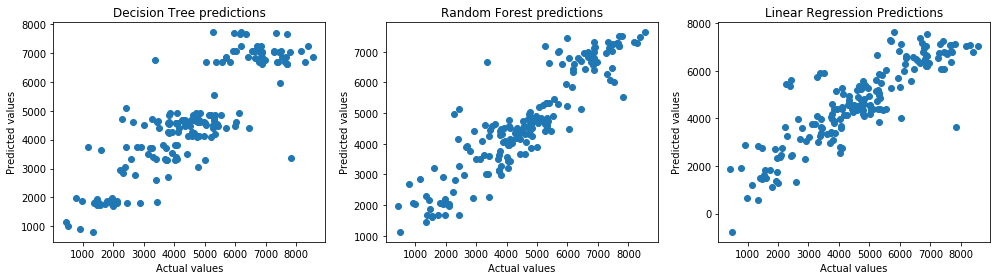

In [36]:
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
plt.title('Decision Tree predictions')
plt.scatter(test.iloc[:,8] , prediction_dt1)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.subplot(1,3,2)
plt.title('Random Forest predictions')
plt.scatter(test.iloc[:,8] , prediction_rf1)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.subplot(1,3,3)
plt.title('Linear Regression Predictions')
plt.scatter(test_LR.iloc[:,26] , prediction_LR)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.tight_layout()

In [ ]:
#finalise random forest

In [44]:
#saving results
test['DT Predictions'] = prediction_dt1
test['RF Predictions'] = prediction_rf1
test['LR Prediction'] = prediction_LR

train.to_csv("TrainFile1.csv", index=False)
test.to_csv("TestFile1.csv", index=False)

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i